<a href="https://colab.research.google.com/github/wintershine987/sea-level-rise-fisheries-AI/blob/main/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Global_production_quantity.csv to Global_production_quantity (1).csv


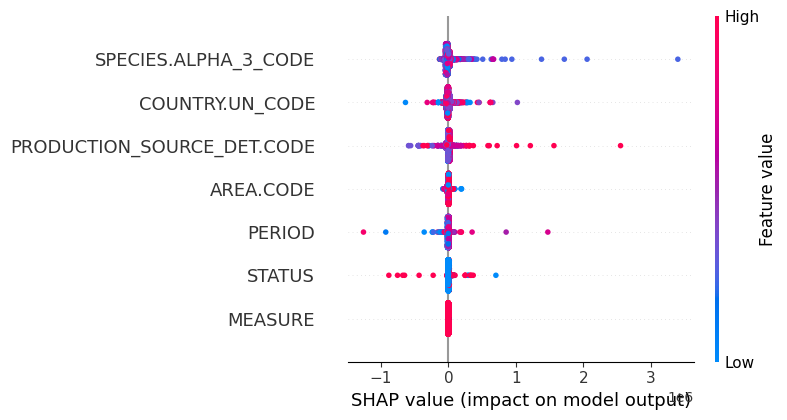

In [ ]:
import pandas as pd
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Global_production_quantity.csv")

# Drop rows where VALUE is missing
df = df.dropna(subset=["VALUE"])

# Filter by Southeast Asia UN country codes and year
df_filtered = df[
    df["COUNTRY.UN_CODE"].isin([96, 104, 116, 360, 458, 608, 626, 702, 764, 704]) &
    df["PERIOD"].between(2005, 2025)]

# Separate features and target
X = df_filtered.drop(columns=["VALUE"])
y = df_filtered["VALUE"]

# Encode categorical features
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == object:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# Compute SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Optional: Ensure test set columns are aligned with training set (rare case)
X_test = X_test[X_train.columns]

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)
